# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle


# TODO: Fill this in based on where you saved the training and testing data

training_file = "../data/train.p"
validation_file="../data/valid.p"
testing_file = "../data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# Basic Data Information
print("Image Shape: {}".format(X_train[0].shape))
print("y Shape: {}".format(y_train.shape))
X_train_percent = len(X_train)/((len(X_train)+len(X_valid)))
X_valid_percent=len(X_valid)/((len(X_train)+len(X_valid)))
print("Training Set: ======= {} samples,{:.2f}% of Training & Validation Set ".format(len(X_train),100*X_train_percent)) # 11% slice-off from Training Data
print("Validation Set: ======= {} samples,{:.2f}% of Training & Validation Set ".format(len(X_valid),100*X_valid_percent)) # 11% slice-off from Training Data
print("Testing Set: ======= {} samples".format(len(X_test)))
#print(X_train.shape,X_train.ndim,type(X_train))


Image Shape: (32, 32, 3)
y Shape: (34799,)
Training Set: ======= 34799 samples,88.75% of Training & Validation Set 
Validation Set: ======= 4410 samples,11.25% of Training & Validation Set 
Testing Set: ======= 12630 samples


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
classes_list,train_count_elements= np.unique(y_train,return_counts=True)  # numpy.unique(arra,return_index=False,return_inverse=Falsem return_counts,axis=None)
n_classes=len(classes_list)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

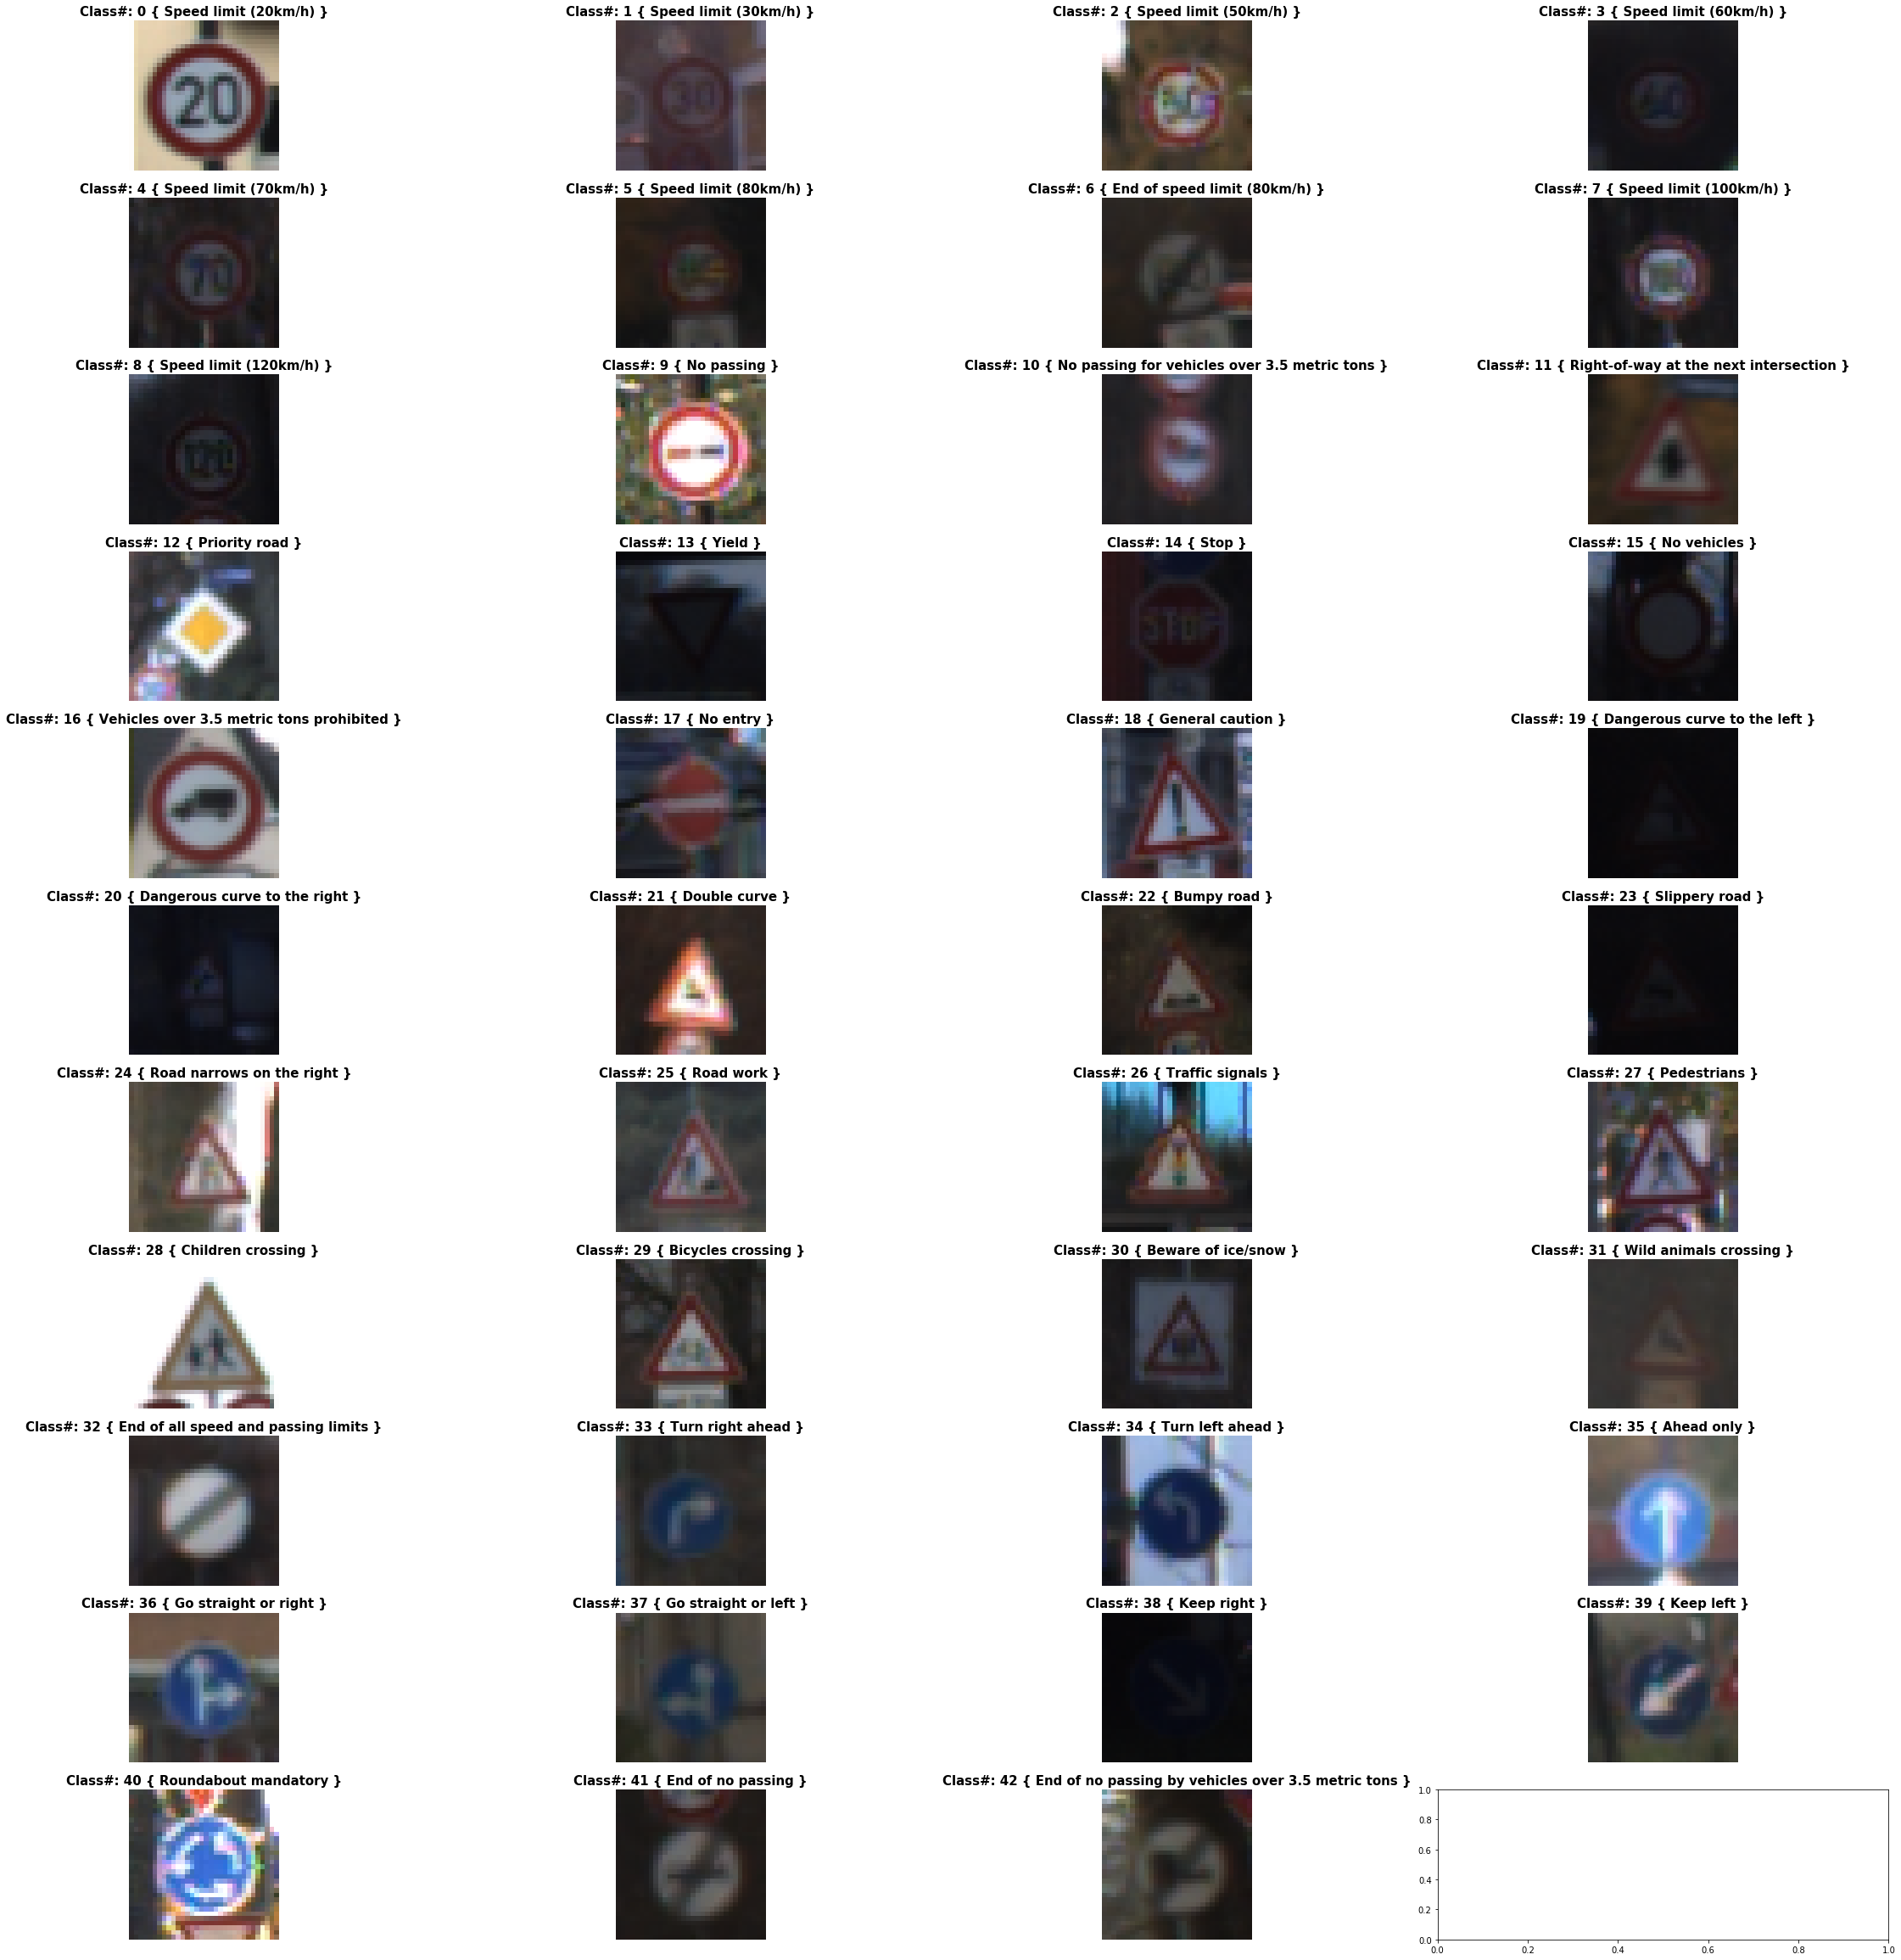

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import matplotlib.pyplot as plt
import csv
# Visualizations will be shown in the notebook.
%matplotlib inline

# plot traffic sign images, count of each sign
# distribution of classes in training, valiation, test set
# Show a single example of each image classifications
y_train_lst=y_train.tolist() #convert ndarray to list for indexing
image_showlist=[]

label_num=0
while (label_num<=n_classes):
    for i in range(n_train):   
        if label_num is y_train_lst[i]:
            image_showlist.append(y_train_lst.index(label_num))
            break
    label_num+=1

# Readin CSV files
f_csv=open('./signnames.csv','r')
csv_reader=csv.reader(f_csv)
csv_dict=dict(csv_reader)
csv_dict.pop('ClassId')
#print(csv_dict)
# Plot Each type of Sign
figure, axs = plt.subplots(11,4, figsize=(32,32))
plt.tight_layout()
n=0
for id in image_showlist:
        axs[n//4,n%4].set_title('Class#: %d { %s }'%(n,csv_dict[str(n)]),fontsize='15',fontweight='bold')
        axs[n//4,n%4].imshow(X_train[id])
        axs[n//4,n%4].axis('off')
        n+=1



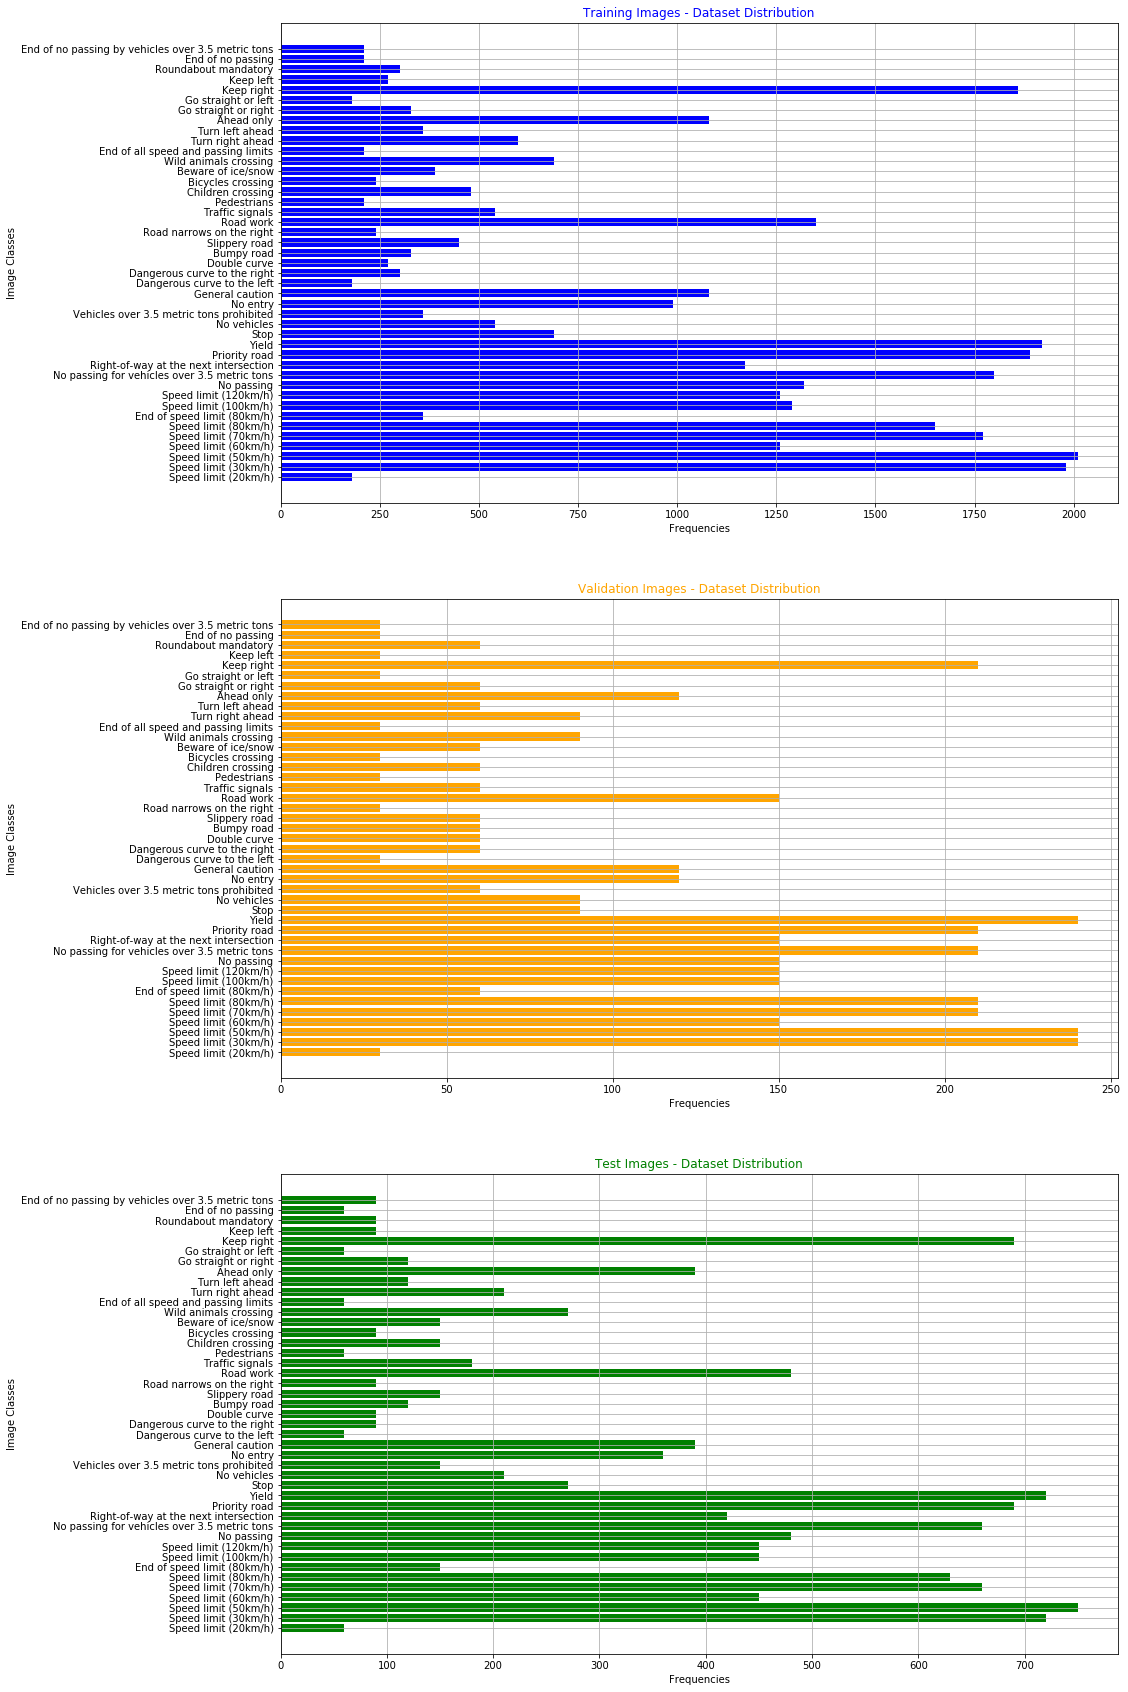

In [4]:
# Look at Distribution distribution of classes
#in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

plt.rcParams['figure.figsize'] = (15.0,30.0) 
fig=plt.figure()
ax1=fig.add_subplot(311)
ax1.set_title('Training Images - Dataset Distribution', color='blue')
ax1.barh(classes_list, train_count_elements,align='center',color='blue')
ax1.set_yticklabels(csv_dict.values())
ax1.grid()

ax1.set_yticks(classes_list)

ax1.set_xlabel('Frequencies')
ax1.set_ylabel('Image Classes')

# Validation Image Datasets
classes_valid_list,valid_count_elements= np.unique(y_valid,return_counts=True) 
ax2=fig.add_subplot(312)
ax2.set_title('Validation Images - Dataset Distribution',color='orange')
ax2.barh(classes_valid_list, valid_count_elements,align='center',color='orange')
ax2.set_yticks(classes_list)
ax2.set_yticklabels(csv_dict.values())
ax2.grid()
ax2.set_xlabel('Frequencies')
ax2.set_ylabel('Image Classes')

# Test Image Datasets
classes_test_list,test_count_elements= np.unique(y_test,return_counts=True) 
ax3=fig.add_subplot(313)
ax3.set_title('Test Images - Dataset Distribution',color='green')
ax3.barh(classes_test_list, test_count_elements,align='center',color='green')
ax3.set_yticks(classes_list)
ax3.set_yticklabels(csv_dict.values())
print()
ax3.grid(csv_dict.values())
ax3.set_xlabel('Frequencies')
ax3.set_ylabel('Image Classes')

plt.savefig('../CarND-Traffic-Sign-Classifier-Project/saved_image/Dateset_Distribution.png')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Data Augmentation
Augmenting the training set to generate some fake images might help improve model performance by distributing each class of image evenly. Common data augmentation techniques include rotation, translation, zoom, flips, and/or color perturbation. These techniques can be used individually or combined.

Our lucky_audience 6439 is selected with label: Speed limit (60km/h)


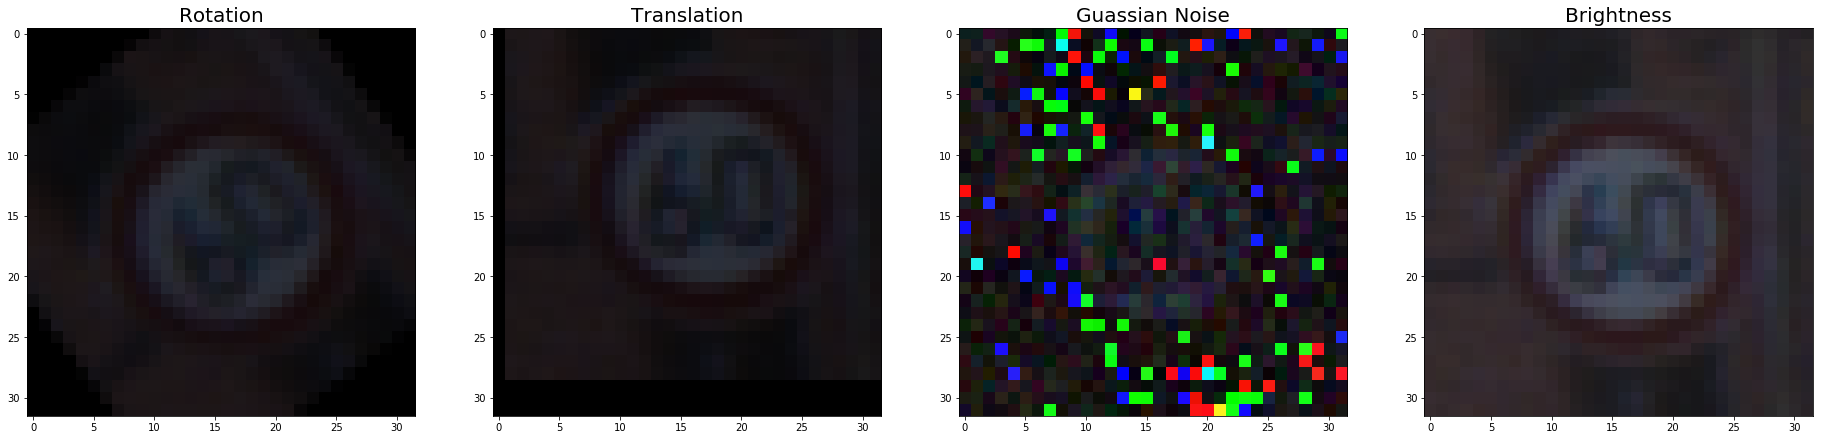

In [5]:
import cv2

### ---Augumentation Function --- ###

def Rotation(image,scale=1.0):# angle: deg
    angle =random.randint(-90,90)
    #print(angle)
    (h,w)=image.shape[:2]
    center=(w/2,h/2)
    M=cv2.getRotationMatrix2D(center,angle,scale)
    rotated=cv2.warpAffine(image,M,(w,h))
    return rotated


def Translation(image):
    (h,w)=image.shape[:2]
    # translation matrix [[1,0,-100],[0,1,-12]]
    x_px=random.randint(-5,5)
    y_px=random.randint(-5,5)
    M = np.array([[1, 0, x_px], [0, 1,y_px]], dtype=np.float32)
    translated = cv2.warpAffine(image, M, (w, h))
    return translated


def gaussian_noise(image):
    image=np.array(image/255,dtype=float)
    mean=0
    #var=random.uniform(0,1)/10
    var=0.002
    noise=np.random.normal(mean,var**0.5,image.shape)
    out=image + noise
    if out.min()<0:
        low_clip=-1
    else:
        low_clip=0
    out=np.clip(out,low_clip,1.0)
    return np.uint8(out*255)


def Brightness(image):
   # g(x) = αf(x) + β
    brighted=np.uint8(np.clip((1.5*image+10),0,255))
    return brighted


# Take Example to Show Augumentation Effect
lucky_audience=random.randint(0,34799) #0
print('Our lucky_audience {} is selected with label: {}'.format(lucky_audience,csv_dict[(str)(y_train[lucky_audience])]))
figs, subplot=plt.subplots(1,4,figsize=(32,32))
subplot=subplot.ravel()

subplot[0].set_title('Rotation',fontsize='20')
subplot[0].imshow(Rotation(X_train[lucky_audience]))

subplot[1].set_title('Translation',fontsize='20')
subplot[1].imshow(Translation(X_train[lucky_audience]))

subplot[2].set_title('Guassian Noise',fontsize='20')
subplot[2].imshow(gaussian_noise(X_train[lucky_audience]))

subplot[3].set_title('Brightness',fontsize='20')
subplot[3].imshow(Brightness(X_train[lucky_audience]))

#print(X_train[0].dtype)

def Augmentaion(image, choice):
    if choice%4 is 0:
        return Rotation(image)
        print('0')
    elif choice%4 is 1:
        return Translation(image)
        print('1')

    elif choice%4 is 2:
        return gaussian_noise(image)
        print('2')

    else:  # module =3
        return Brightness(image)
        print('3')

        

Before, the training set is #34799. The Augumentation method will expand the size of training set.

After, Augumentation the training set is expanded to <strong> #46480. </strong>


In [ ]:
# Generate fake data for Less-Distributed image classes
# Hope the image should be at 
from collections import Counter
result=Counter(y_train)
print(result)
class_min=min(result,key=lambda x: result[x])
#print(y_train)
print('The least # class: {}, which has {} samples'.format(class_min,result[class_min]))

# The level I can get is 162x5(4 Aug func + 1 exist) = 810 ≈800
class_NeedAug=[k for k,v in result.items() if v<=800]
print('These classes need to be expanded: \n',class_NeedAug)
X_Augmentated_train=[]
y_Augmentated_train=[]
#Aug_class_id=[]
Aug_class_id=np.where(y_train==36)[0].tolist()
X_NEW=X_train
y_NEW=y_train



for id_NewGeneration in class_NeedAug:  #id_NewGeneration: 41, 31, 36 iterable
    print('Start with:',id_NewGeneration)
    Aug_class_id=np.where(y_train == id_NewGeneration)[0].tolist()  # lst:Ids of Images_tobe_Aug.ed eg.label31=[900-1229]
    Aug_class_length=result[id_NewGeneration]     # eg. 36--length=330
    Aug_choice=0   # augmentation method/choice
    i=0            # image batch
    while i <=(800-result[id_NewGeneration]*2):   # eg. 37: 180 samples  i<=620 i+=180
        #1. Generate New Image   
        for image_id in Aug_class_id:
            new_image=Augmentaion(X_train[image_id],Aug_choice)  #1.Rotation ... 2. translation
            X_Augmentated_train.append(new_image)
            y_Augmentated_train.append(id_NewGeneration)
        Aug_choice+=1  # 0-->1 for next round, new aug method
        i+=Aug_class_length
    else:   # i>800
        still_need=800-(i+Aug_class_length)
        for image_id in range(Aug_class_id[0],Aug_class_id[0]+still_need):
            new_image=Augmentaion(X_train[image_id],Aug_choice)  #1.Rotation ... 2. translation
            X_Augmentated_train.append(new_image)
            y_Augmentated_train.append(id_NewGeneration)
    # vstack/concatenate to Exist. X_train, y_train
    X_NEW=np.concatenate((X_NEW,X_Augmentated_train),axis=0)
    y_NEW=np.concatenate((y_NEW,y_Augmentated_train),axis=0)
    # clear Aug_x, aug_y for next use
    X_Augmentated_train.clear()
    y_Augmentated_train.clear()

    
X_train=X_NEW
y_train=y_NEW
del X_NEW
del y_NEW
print('<==========Augumentation Done============>')

print('New Training set X_train is: ',np.shape(X_train))
print('New Training set y_train is: ',np.shape(y_train))


print('<==========New Training VS Validation Distribution============>')

X_train_percent = len(X_train)/((len(X_train)+len(X_valid)))
X_valid_percent=len(X_valid)/((len(X_train)+len(X_valid)))
print("Training Set: ======= {} samples,{:.2f}% of Training & Validation Set ".format(len(X_train),100*X_train_percent)) # 11% slice-off from Training Data
print("Validation Set: ======= {} samples,{:.2f}% of Training & Validation Set ".format(len(X_valid),100*X_valid_percent)) # 11% slice-off from Training Data
print("Testing Set: ======= {} samples".format(len(X_test)))


In [ ]:
# Test Function: Do not need to Run
'''
X_Augmentated_train=[]
y_Augmentated_train=[]
#Aug_class_id=[]
Aug_class_id=np.where(y_train==36)[0].tolist()
### ------ Test ---------------###
id_NewGeneration=0
Aug_class_id=np.where(y_train == id_NewGeneration)[0].tolist()  # lst:Ids of Images_tobe_Aug.ed eg.label31=[900-1229]
Aug_class_length=result[id_NewGeneration]     # eg. 36--length=330
Aug_choice=0   # augmentation method/choice
i=0            # image batch
while i <=(800-result[id_NewGeneration]*2):   # eg. 37: 180 samples  i<=620 i+=180
    print('Enter---->',i)
    #1. Generate New Image   
    for image_id in Aug_class_id:
        new_image=Augmentaion(X_train[image_id],Aug_choice)  #1.Rotation ... 2. translation
        X_Augmentated_train.append(new_image)
        y_Augmentated_train.append(id_NewGeneration)
    Aug_choice+=1  # 0-->1 for next round, new aug method
    i+=Aug_class_length
    print('Leave---->',i)
    print("1st half:",len(X_Augmentated_train))
else:   # i>800
    print('Flagggg',i)
    still_need=800-(i+Aug_class_length)
    for image_id in range(Aug_class_id[0],Aug_class_id[0]+still_need):
        new_image=Augmentaion(X_train[image_id],Aug_choice)  #1.Rotation ... 2. translation
        X_Augmentated_train.append(new_image)
        y_Augmentated_train.append(id_NewGeneration)
# vstack/concatenate to Exist. X_train, y_train
#print(len(X_Augmentated_train))   #should be expand 620
#print(len(y_Augmentated_train))
#print(len(X_Augmentated_train[0][0][0]))  # 32 x 32x3
#print(np.shape(X_Augmentated_train[0]))  # 32 x 32x3


print(type(X_Augmentated_train))
print(np.shape(X_Augmentated_train))
print(np.shape(X_train)) # X_train(34799, 32, 32, 3)
x_testttt=np.concatenate((X_train,X_Augmentated_train),axis=0)
print(np.shape(x_testttt))
'''

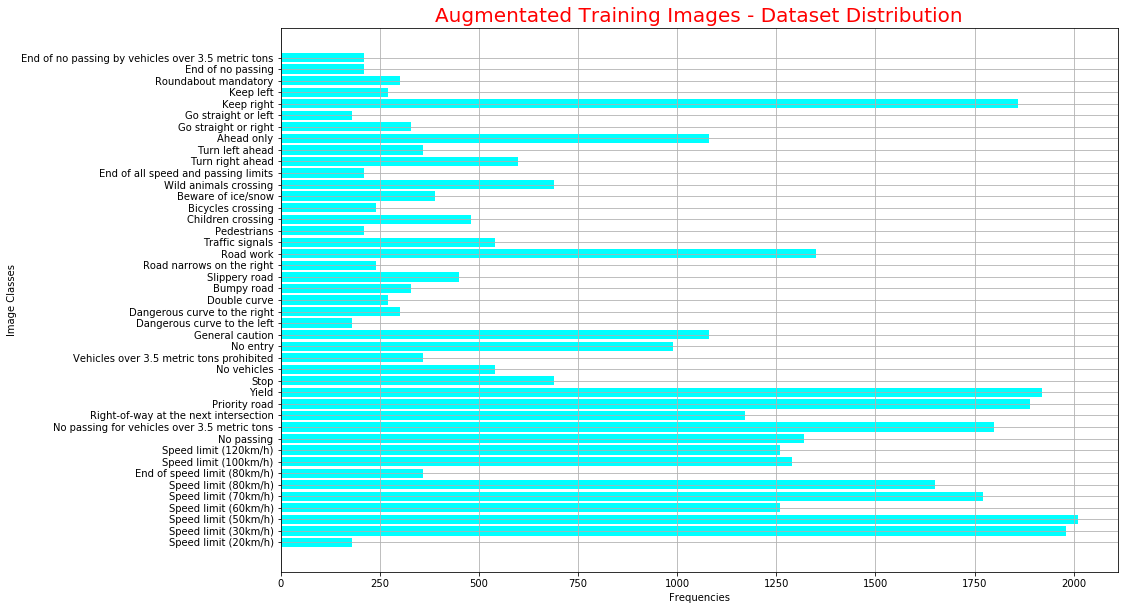

In [6]:
classes_list_new,train_count_elements_new= np.unique(y_train,return_counts=True)  # numpy.unique(arra,return_index=False,return_inverse=Falsem return_counts,axis=None)

plt.rcParams['figure.figsize'] = (15.0,10.0) 
fig=plt.figure()
ax4=fig.add_subplot(111)
ax4.set_title('Augmentated Training Images - Dataset Distribution', color='Red',fontsize='20')
ax4.barh(classes_list_new, train_count_elements_new,align='center',color='cyan')
ax4.set_yticklabels(csv_dict.values())
ax4.grid()
ax4.set_yticks(classes_list_new)

ax4.set_xlabel('Frequencies')
ax4.set_ylabel('Image Classes')
plt.savefig('../CarND-Traffic-Sign-Classifier-Project/saved_image/Augumentated_Dateset_Distribution.png')



### Split the Training and Validation Datasets

--- Without Data Augmentation:

From the above, The Training dataset takes 88.75% percent while The Validation dataset takes 11.25% percent. The desired structure should be 80%-20%; by slicing of 10%(0.1) from training set.

--- With Data Augmentation:

From the above, The Training dataset takes 91.33% percent while The Validation dataset takes 8.67% percent. The desired structure should be 80%-20%; by slicing of 12.4%(0.124) from training set.

In [7]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train,X_valid_new,y_train,y_valid_new=train_test_split(X_train,y_train,test_size=0.124,random_state=0,stratify=y_train)

X_valid=np.vstack((X_valid,X_valid_new))
y_valid=np.hstack((y_valid,y_valid_new))
print('New Separation from Training #: X_valid_new: {} , y_valid_new: {} '.format(len(X_valid_new),len(y_valid_new)))
print('Now X_train# : {}, y_train: {}'.format(X_train.shape,y_train.shape))
print('Now X_valid# : {}, y_valid: {}'.format(X_valid.shape,y_valid.shape))

X_train_percent_new=len(X_train)/((len(X_train)+len(X_valid)))
X_valid_percent_new=len(X_valid)/((len(X_train)+len(X_valid)))
print("Training Set: ======= {} samples,{:.2f}% of Training & Validation Set ".format(len(X_train),100*X_train_percent_new)) # 11% slice-off from Training Data
print("Validation Set: ======= {} samples,{:.2f}% of Training & Validation Set ".format(len(X_valid),100*X_valid_percent_new)) # 11% slice-off from Training Data


New Separation from Training #: X_valid_new: 4316 , y_valid_new: 4316 
Now X_train# : (30483, 32, 32, 3), y_train: (30483,)
Now X_valid# : (8726, 32, 32, 3), y_valid: (8726,)
Training Set: ======= 30483 samples,77.74% of Training & Validation Set 
Validation Set: ======= 8726 samples,22.26% of Training & Validation Set 


### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

2. Min-Max Scaling may be taken as an option: $
X'=a+{\frac {\left(X-X_{\min }\right)\left(b-a\right)}{X_{\max }-X_{\min }}}
$



In [8]:
from sklearn.utils import shuffle

# Normalization to have 0 Mean & equal Variance

def RGB_Normalize(image_data):
    #return (image_data-128.0)128
    return (image_data.astype(np.float32)-128)/128

# result:[-1~＋1] # ValueError: Floating point image RGB values must be in the 0..1 range.
# Solution 1：  matplotlib 2.02 will solve this display problem
# Solution 2:  import tensorflow as tf, tf.clip_by_value(rgb_normalized_images,0.0,1.0)  
#              convert back from tensor to ndarray, .eval(session=sess)


# Grayscale
def Gray_Normalzied(image_data): 
    gray=np.mean(image_data,axis=3,keepdims=True)
    return (gray-0)/255*0.8+0.1
    #return -1+ (image_data-0)*(1+1)/(255)

'''
# Using RGB- Normalized Method
X_train=RGB_Normalize(X_train)
X_valid=RGB_Normalize(X_valid)
X_test=RGB_Normalize(X_test)
'''

X_train=Gray_Normalzied(X_train)
X_valid=Gray_Normalzied(X_valid)
X_test=Gray_Normalzied(X_test)

    


# Shuffle the Training data
X_train, y_train = shuffle(X_train, y_train)
#plt.imshow(X_train[0].squeeze())


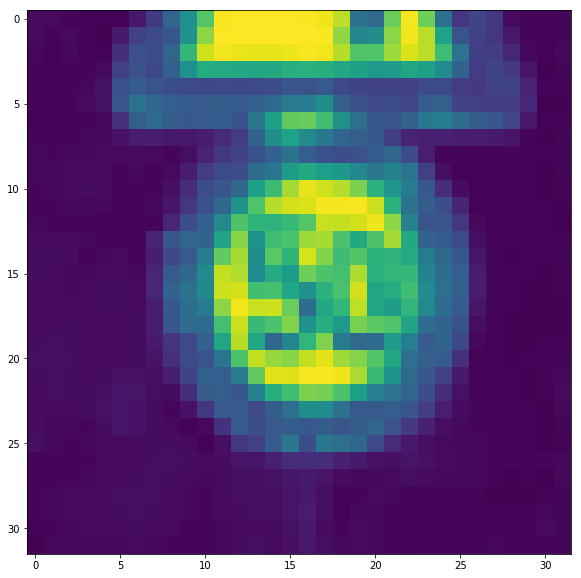

In [9]:
plt.imshow(X_train[0].squeeze())

### LeNet Architecture
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. First, we load the normalized_rgb images with 3 channels.

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

#Courtesy: http://alexlenail.me/NN-SVG/LeNet.html or use Scikit-plot
# cloud-tecent.con/developer/article/1478399


### 1. SetUp Tensor Flow
The EPOCH and BATCH_SIZE values affect the training speed and model accuracy.

In [17]:
import tensorflow as tf

#Hyperparameters
EPOCHS = 50
BATCH_SIZE = 100
learning_rate=0.001
# Dropout: only applied in the training set, in this case, after fully connected layer
keep_prob=0.75 # Dropout, probability to keep units for redundancy, more robust

### 2. Implement LeNet-5 Architecture


In [18]:
from tensorflow.contrib.layers import flatten

def LeNet(x,keep_prob,num_channels):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    # tf.truncated_normal(shape, mean=0.0, stddev=default 1.0)
    mu = 0
    #sigma = 1.0  # for -1 ~1 RGB_normalized Images  Original 0.1
    sigma = 0.1  # for -1 ~1 RGB_normalized Images  Original 0.1
    # weight=(patch_height,patch_width,input_depth,output_depth)
    # bias=zeros(ouput_depth)
    
    weights={'wc1':tf.Variable(tf.truncated_normal((5,5,num_channels,6),mean=mu,stddev=sigma)),
             'wc2':tf.Variable(tf.truncated_normal((5,5,6,16),mean=mu,stddev=sigma)),
             'wd1':tf.Variable(tf.truncated_normal((400,120),mean=mu,stddev=sigma)),
             'wd2':tf.Variable(tf.truncated_normal((120,84),mean=mu,stddev=sigma)),
             'wd3':tf.Variable(tf.truncated_normal((84,43),mean=mu,stddev=sigma)),  # 43 classes
            }
    biases ={'bc1':tf.Variable(tf.zeros(6)),
             'bc2':tf.Variable(tf.zeros(16)),
             'bd1':tf.Variable(tf.zeros(120)),
             'bd2':tf.Variable(tf.zeros(84)),
             'bd3':tf.Variable(tf.zeros(43)),  # 43 classes
            }
    
    '''
    tf.nn.conv2d(input,filters,strides, padding)
    tf.nn.max_pool(input, ksize,strides,padding)
    '''
    
    #===========Layer 1: Convolutional.============
    # Input = 32x32x1. Output = 28x28x6.
    # weights=[5,5] strides=1, padding='Valid' p=0
    conv1=tf.nn.conv2d(x,weights['wc1'],strides=[1,1,1,1],padding='VALID')
    conv1=tf.nn.bias_add(conv1,biases['bc1'])
    # Activation.
    conv1=tf.nn.relu(conv1)
    
    # --------- Subsampling S2----------------
    #Pooling. Input = 28x28x6. Output = 14x14x6.  <----- # Max_pool Not affecting the depth
    #ksize & strdies =[batch_size,k_height,k_width,depth=1]
    conv1=tf.nn.max_pool(conv1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
    # ==========Layer 2: Convolutional. ============
    # Input = 28x28x6. Output = 10x10x16.
    conv2=tf.nn.conv2d(conv1,weights['wc2'],strides=[1,1,1,1],padding='VALID')
    conv2=tf.nn.bias_add(conv2,biases['bc2'])
    # Activation.
    conv2=tf.nn.relu(conv2)    
       
    # --------- Subsampling S4----------------
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2=tf.nn.max_pool(conv2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
    # Flatten. Input = 5x5x16. Output = 400.
    flat_layer=flatten(conv2)

    
    # ************** F3: Fully Connected Layer***********
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fully_layer3=tf.add(tf.matmul(flat_layer,weights['wd1']),biases['bd1'])
    # Activation.
    fully_layer3=tf.nn.relu(fully_layer3)
    # Dropout.
    fully_layer3=tf.nn.dropout(fully_layer3,keep_prob)   

    
    # ************** F4: Fully Connected Layer***********
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fully_layer4=tf.add(tf.matmul(fully_layer3,weights['wd2']),biases['bd2'])
    # Activation.
    fully_layer4=tf.nn.relu(fully_layer4)
    # Dropout.
    fully_layer4=tf.nn.dropout(fully_layer4,keep_prob)   

    
    # ************** F4: Fully Connected Layer***********    
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fully_layer5=tf.add(tf.matmul(fully_layer4,weights['wd3']),biases['bd3'])
    logits=fully_layer5
   
    return logits

### 3. Features and Labels
Train LeNet to classify Traffic sign images data.

x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.


In [19]:
# tf Graph input

#store input batches. None--> allows placeholder to later to accept a batch of ANY Size x (32x32x1 images)
#num_channels=3 # RGB_Normalized
num_channels=1 # Gray_Normalized
x = tf.placeholder(tf.float32, (None, 32, 32, num_channels),'X_data')
y = tf.placeholder(tf.int32, (None),'Y_data')    # labels here come thru with sparse variablesm, interger, Not One_Hot Encoded
one_hot_y = tf.one_hot(y, 43)
Keep_prob = tf.placeholder(tf.float32)


### 4.Training Pipeline
Create a training pipeline that uses the model to classify data.

In [20]:
logits = LeNet(x,keep_prob,num_channels)
#Cross Entroy: A measure of differnece (the logis & the ground-truth labels)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)   #cost, Average Entropy from All of imagese the network & minimize training loss
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate) #similar to S.G.D. (Stochastic Gradient Descent)
training_operation = optimizer.minimize(loss_operation)  #cost  # Minimize use backpropogatoin to updat


### 5.Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [21]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1)) # Compare each individual prediction
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) # Caclculate overall accuracy by averaging individual prediction accuracies
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,Keep_prob:keep_prob})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [ ]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

Training...

EPOCH 1 ...
Train Accuracy = 0.500
Validation Accuracy = 0.464

EPOCH 2 ...
Train Accuracy = 0.704
Validation Accuracy = 0.674

EPOCH 3 ...
Train Accuracy = 0.774
Validation Accuracy = 0.744

EPOCH 4 ...
Train Accuracy = 0.837
Validation Accuracy = 0.803

EPOCH 5 ...
Train Accuracy = 0.864
Validation Accuracy = 0.833

EPOCH 6 ...
Train Accuracy = 0.884
Validation Accuracy = 0.852

EPOCH 7 ...
Train Accuracy = 0.901
Validation Accuracy = 0.866

EPOCH 8 ...
Train Accuracy = 0.914
Validation Accuracy = 0.885

EPOCH 9 ...
Train Accuracy = 0.922
Validation Accuracy = 0.887

EPOCH 10 ...
Train Accuracy = 0.928
Validation Accuracy = 0.896

EPOCH 11 ...
Train Accuracy = 0.929
Validation Accuracy = 0.898

EPOCH 12 ...
Train Accuracy = 0.940
Validation Accuracy = 0.904

EPOCH 13 ...
Train Accuracy = 0.936
Validation Accuracy = 0.899

EPOCH 14 ...
Train Accuracy = 0.953
Validation Accuracy = 0.916

EPOCH 15 ...
Train Accuracy = 0.951
Validation Accuracy = 0.918

EPOCH 16 ...
Train Ac

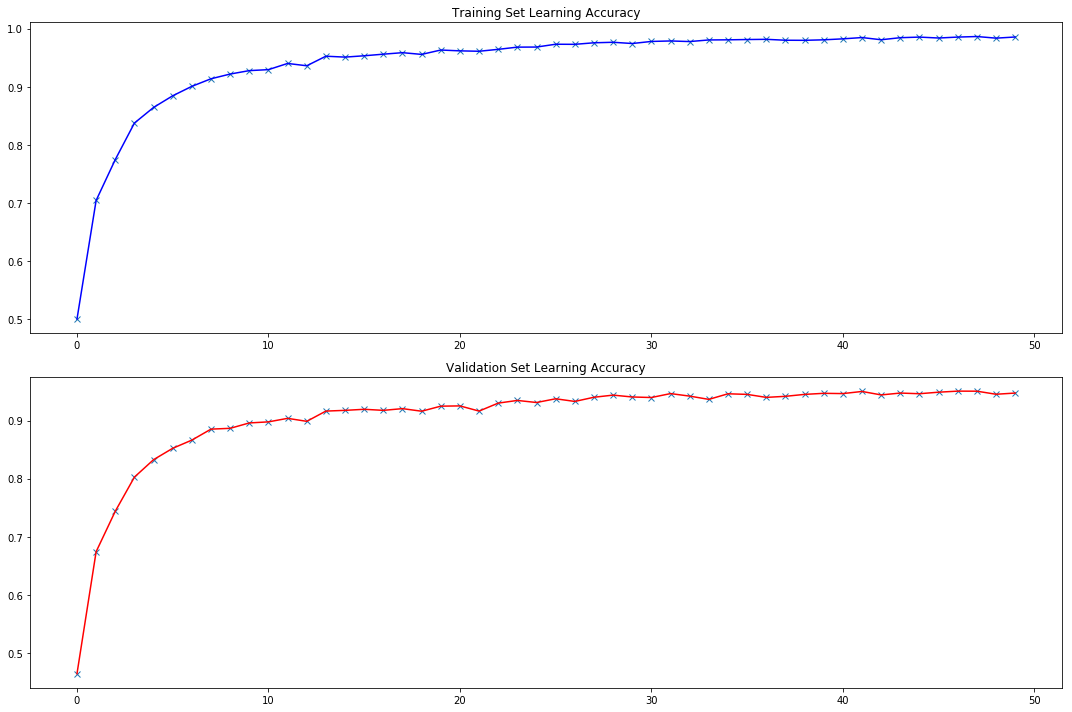

In [22]:
train_acc_batch = []
valid_acc_batch = []


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
#        X_train, y_train = shuffle(X_train, y_train)  # shuffle images for each epoch
        X_train, y_train = shuffle(X_train, y_train)  # shuffle images for each epoch
        for offset in range(0, num_examples, BATCH_SIZE):  # train models for each batch
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,Keep_prob:keep_prob})

        train_accuracy = evaluate(X_train, y_train) 
        validation_accuracy = evaluate(X_valid, y_valid)
        
        train_acc_batch.append(train_accuracy)
        valid_acc_batch.append(validation_accuracy)
        
        print("EPOCH {} ...".format(i+1))
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))

        print()
        
    #saver.save(sess, './lenet')
    saver.save(sess, './lenet_withoutAugumentation')
    print("Model saved")
    
Train_acc = plt.subplot(211)
Train_acc.set_title('Training Set Learning Accuracy')
Train_acc.plot(train_acc_batch,'x',)
Train_acc.plot(train_acc_batch,'b')

Valid_acc = plt.subplot(212)
Valid_acc.set_title('Accuracy')
Valid_acc.set_title('Validation Set Learning Accuracy')
Valid_acc.plot(valid_acc_batch,'x',)
Valid_acc.plot(valid_acc_batch,'r')
plt.tight_layout()
plt.show()
plt.savefig('../CarND-Traffic-Sign-Classifier-Project/saved_image/Trainning and Validation Results.png')


### Modification Log History 

1. Using Lenet5 Architecture 
   Feed RGB image channels into the network
   1.1 Using RGB Normalized mu=0,sigma=1.0, epoch=30,batch_size=128,learn_rate=0.001,keep_prob=0.75 --> Valiation set: 23%
   1.2 change sigma= 0.1  94.5%
   1.3 rgb with augumentation 93.1%
   1.4 Highest aug 92% using grayscale min-max
2. Take out The Augumentation 95.3%

### 6. Evaluate on the Testing Data Set

Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once! This will give you a good indicator of how well the model will do in the real world.

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.


In [24]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}%".format(test_accuracy*100))

INFO:tensorflow:Restoring parameters from ./lenet_withoutAugumentation
Test Accuracy = 89.683%


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

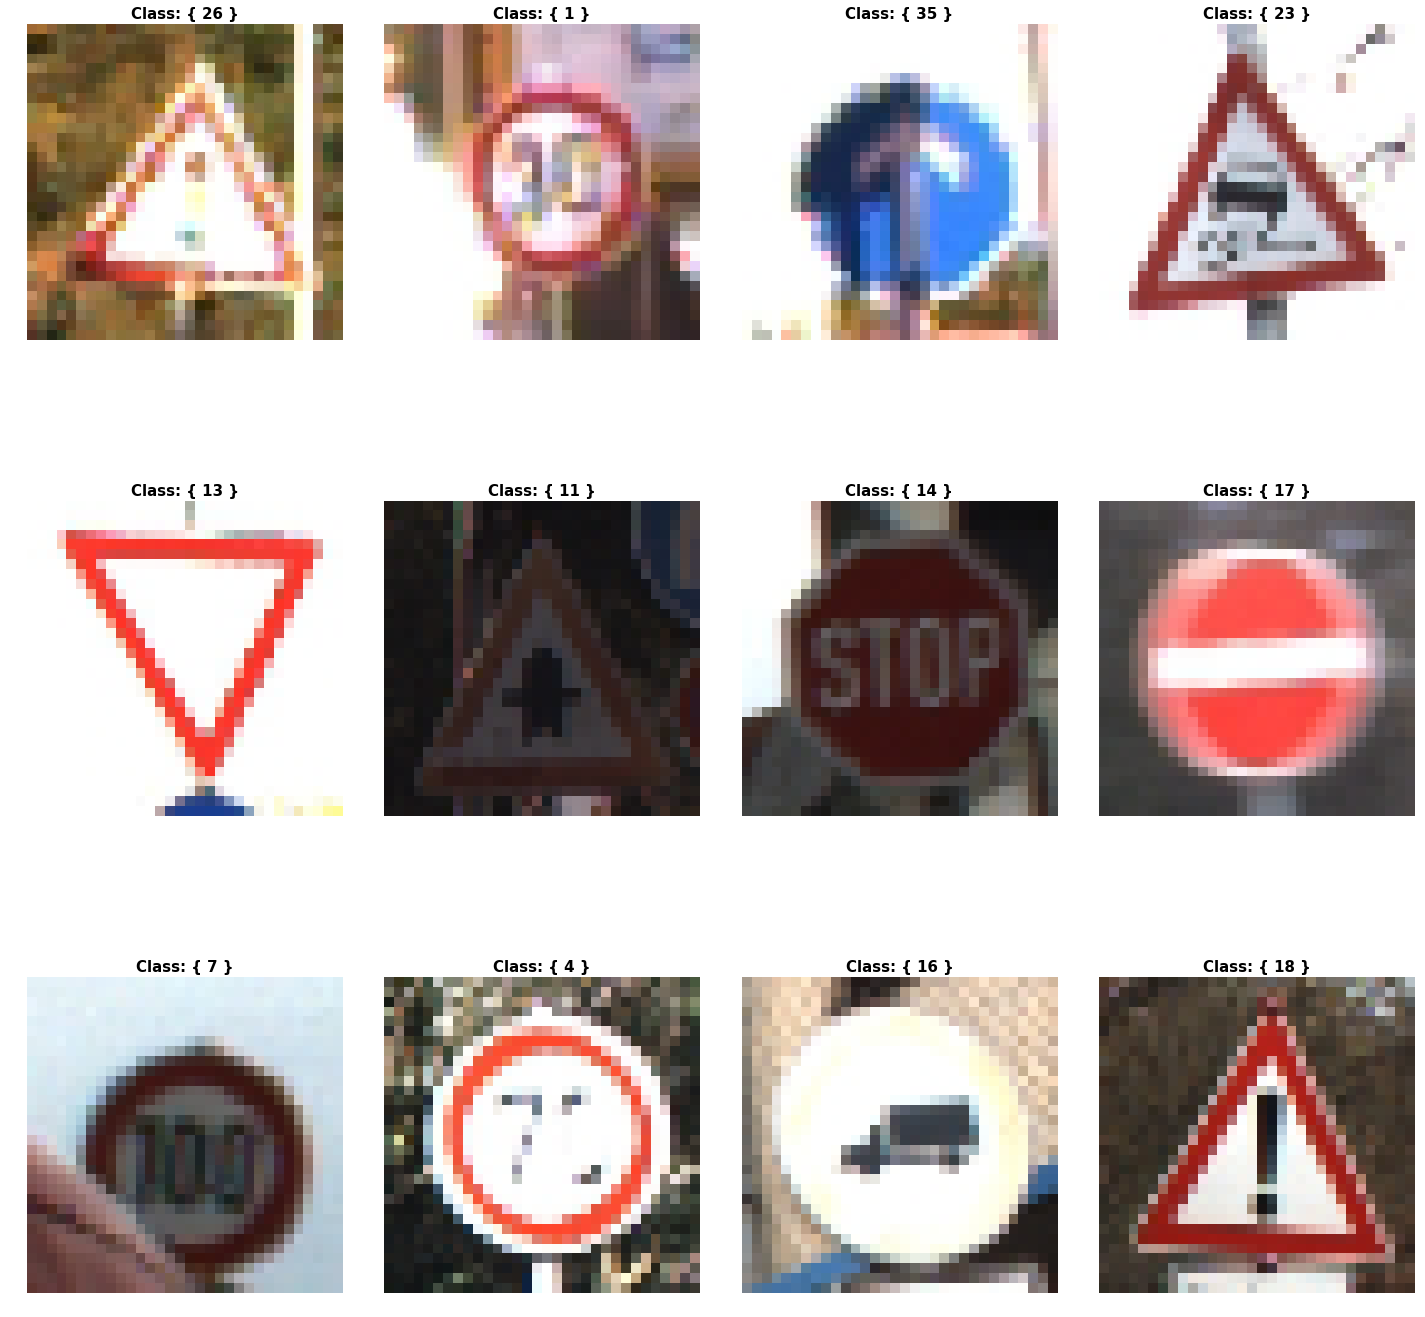

In [27]:
# To test the insight of your model, Uploaad 16 images from Germain traffic signs.
from glob import glob
import matplotlib.image as mpimg
import cv2 
import re

new_test_images_path = glob('../CarND-Traffic-Sign-Classifier-Project/New_Image_Dataset/*')

new_test_images=[]
Y_Add_testdata=[]
for image in new_test_images_path:
    img=mpimg.imread(image)
    img=cv2.resize(img,(32,32)) # interplation default: Inter_linear
    label=re.findall('\/New_Image_Dataset\/([0-9]{2})\_',image)[0]
    label.split('\'')
    Y_Add_testdata.append(int(label))
    new_test_images.append(img)
    # print(img.shape)    -- # (80,80,3)
#plt.imshow(new_test_images[0])

X_Add_testdata=np.asarray(new_test_images)
Y_Add_testdata=np.asanyarray(Y_Add_testdata) #ndim=1
#print(type(Y_Add_testdata),Y_Add_testdata.shape)
#Y_Add_testdata=np.array([4,23,11,26,  7,14,2,17,  40, 35,16, 18, 22,28,13,12,]) #  labels of additional test set

# Plot Each type of Sign
figure, axs = plt.subplots(3,4, figsize=(20,20))
plt.tight_layout()
n=0
for id in range(len(new_test_images)):
        axs[n//4,n%4].set_title('Class: { %d }'%Y_Add_testdata[id],fontsize='15',fontweight='bold')
        axs[n//4,n%4].imshow(new_test_images[id])
        axs[n//4,n%4].axis('off')
        n+=1
plt.savefig('../CarND-Traffic-Sign-Classifier-Project/saved_image/New_Imported_Images.png')


### Predict the Sign Type for Each Image

In [28]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# Normalization

X_Add_testdata=Gray_Normalzied(X_Add_testdata)

X_Add_testdata, Y_Add_testdata = shuffle(X_Add_testdata, Y_Add_testdata)


with tf.Session() as sess:
    # sess.run(tf.global_variables_initializer()) 
    saver.restore(sess,tf.train.latest_checkpoint('.'))  # saver.restore(sess,'./lenet.meta)
    prediction = sess.run(tf.argmax(logits, 1), feed_dict={x: X_Add_testdata})
    print("Prediction is ", prediction)
    print("Actual is     ", Y_Add_testdata)
    Add_test_accuracy = evaluate(X_Add_testdata, Y_Add_testdata)
    print("Additional Test Accuracy = {:.3f}".format(Add_test_accuracy))


INFO:tensorflow:Restoring parameters from ./lenet_withoutAugumentation
Prediction is  [18 13 15 14  4  1 17 16 26 23 11 35]
Actual is      [18 13  7 14  4  1 17 16 26 23 11 35]
Additional Test Accuracy = 0.917


In [29]:
print("Prediction is ", prediction)
print("Actual is     ", Y_Add_testdata)
count=0
for i in range(len(Y_Add_testdata)):
    if prediction[i]!=Y_Add_testdata[i]:
        count+=1
print("Accuracy is: %s"% (1-count/len(Y_Add_testdata)))


Prediction is  [18 13 15 14  4  1 17 16 26 23 11 35]
Actual is      [18 13  7 14  4  1 17 16 26 23 11 35]
Accuracy is: 0.9166666666666666


### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

# print prediction and each image

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [30]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))  # saver.restore(sess,'./lenet.meta)
    k=5
    top_k = tf.nn.top_k(tf.nn.softmax(logits), k)
    top_5_softmax = sess.run(top_k, feed_dict={x: X_Add_testdata, Keep_prob: 1.0})
    #print(len(X_Add_testdata))
    for n in range(len(X_Add_testdata)):
       # plt.show(X_Add_testdata[n])
        print('This image is [ %s ] , The prediction result of Network is [ %s ]'%(Y_Add_testdata[n], Y_Add_testdata[n] == prediction[n]))
        for i in range(k):
            print("The -- %s -- Ranking prediction for {Actual %s } image is %s with probability: %s "%(i, Y_Add_testdata[n],top_5_softmax[1][n][i], top_5_softmax[0][n][i]))

INFO:tensorflow:Restoring parameters from ./lenet_withoutAugumentation
This image is [ 18 ] , The prediction result of Network is [ True ]
The -- 0 -- Ranking prediction for {Actual 18 } image is 18 with probability: 1.0 
The -- 1 -- Ranking prediction for {Actual 18 } image is 26 with probability: 5.20829e-18 
The -- 2 -- Ranking prediction for {Actual 18 } image is 27 with probability: 1.62474e-28 
The -- 3 -- Ranking prediction for {Actual 18 } image is 11 with probability: 7.27548e-34 
The -- 4 -- Ranking prediction for {Actual 18 } image is 25 with probability: 4.63899e-38 
This image is [ 13 ] , The prediction result of Network is [ True ]
The -- 0 -- Ranking prediction for {Actual 13 } image is 13 with probability: 1.0 
The -- 1 -- Ranking prediction for {Actual 13 } image is 35 with probability: 2.42367e-20 
The -- 2 -- Ranking prediction for {Actual 13 } image is 15 with probability: 2.78872e-33 
The -- 3 -- Ranking prediction for {Actual 13 } image is 34 with probability: 6.0

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")